In [1]:
import pandas as pd

In [2]:
X_train_full = pd.read_csv(".\\data\\home-data-for-ml-course\\train.csv")
X_test_full = pd.read_csv(".\\data\\home-data-for-ml-course\\test.csv")

In [3]:
y = X_train_full.SalePrice
X_train_full.drop("SalePrice", axis=1, inplace=True)

In [4]:
categorical_col = [col for col in X_train_full.columns if X_train_full[col].dtype == 'object' and X_train_full[col].nunique() < 10]
print(categorical_col)
len(categorical_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


40

In [5]:
numerical_col = X_train_full.columns[X_train_full.dtypes != 'object']
print(numerical_col)
print(len(numerical_col))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
37


In [6]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

numerical_transformer = SimpleImputer(strategy="constant")

categorical_transformer = Pipeline(steps=[
    ("imputer", numerical_transformer),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_col),
        ("cat", categorical_transformer, categorical_col)
    ]
)



In [25]:
def get_score(iter):
    
    my_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(n_estimators=100, random_state=0))
    ])
    score_arr =  -1 * cross_val_score(my_pipeline, X_train_full, y, scoring="neg_mean_absolute_error", cv=iter)
    return score_arr

score_list = []

for iter in range(5, 22, 2):
    score = get_score(iter)
    print(f"CV score for {iter}-fold: {score.mean()}")
    score_list.append(score.mean())

# scores = [lambda x : get_score(x)]
# scores

CV score for 5-fold: 17780.474130136987
CV score for 7-fold: 17865.038981117566
CV score for 9-fold: 17597.067728967322
CV score for 11-fold: 17461.73454514385
CV score for 13-fold: 17623.51123833025
CV score for 15-fold: 17502.334282628515
CV score for 17-fold: 17543.395342801963
CV score for 19-fold: 17665.033607133868
CV score for 21-fold: 17475.536722271518


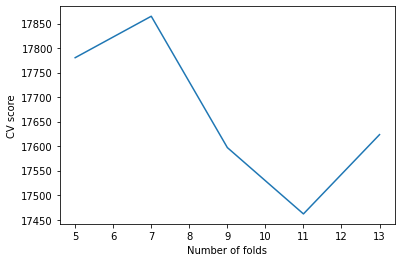

In [24]:
from matplotlib import pyplot as plt

plt.plot(range(5, 15, 2), score_list)
plt.xlabel("Number of folds")
plt.ylabel("CV score")
plt.show()


In [7]:
def get_score(n_estimators):
    
    my_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    ])
    score_arr =  -1 * cross_val_score(my_pipeline, X_train_full, y, scoring="neg_mean_absolute_error", cv=10)
    return score_arr

score_list = []

for n_est in range(50, 301, 50):
    score = get_score(n_est)
    print(f"CV score for {n_est}-n_estimators: {score.mean()}")
    score_list.append(score.mean())

CV score for 50-n_estimators: 17621.418945205478
CV score for 100-n_estimators: 17363.022595890412
CV score for 150-n_estimators: 17340.80523287671
CV score for 200-n_estimators: 17368.196352739727
CV score for 250-n_estimators: 17394.15669589041
CV score for 300-n_estimators: 17381.46412328767


In [11]:
# from matplotlib import pyplot as plt

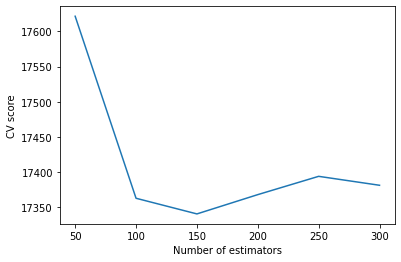

In [12]:
plt.plot(range(50, 301, 50), score_list)
plt.xlabel("Number of estimators")
plt.ylabel("CV score")
plt.show()